# Analyze models with Shap

In [2]:
import shap
import numpy as np
from utils import smoothing, load_data

### Load datasets and define feature names


In [3]:
train_path = 'train/tartagal0_train.csv'
col_names = ['Country NDVI lag 1', 'Country NDWI lag 1', 'Country LST day lag 3',  
             'Country LST night lag 1', 'Country TRMM lag 3', 'Country cold days 10', 
             'Country cold degrees 10']


n_cols, weeks, y, X = load_data(filename=train_path)

In [4]:
# Rename feature names to avoid Country redundancy
col_names = ['NDVI lag 1', 'NDWI lag 1', 'LST day lag 3',  
             'LST night lag 1', 'TRMM lag 3', 'cold days 10', 
             'cold degrees 10']

## XgBoost model

In [5]:
import pandas as pd
from xgboost import XGBRegressor
import xgboost
shap.initjs()

In [6]:
df_X = pd.DataFrame(X, columns=col_names)
df_y = pd.DataFrame(y, columns=['abundancy'])

In [7]:
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(df_X, label=df_y), 100)

### Plot abundancy to visualize the curve

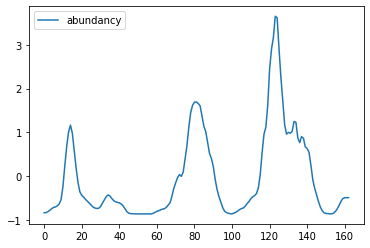

In [30]:
df_y.plot()

## See some stats of the model trained 

In [8]:
from utils import stats, print_stats

In [72]:
scores, mean, std_dev = stats(df_X, df_y, XGBRegressor())

In [73]:
print_stats(scores, mean, std_dev)


Stats
-----

Model Scores:  [0.35730481 1.06274076 0.40952198 1.35715175 1.32024264]
Mean Score:  0.9013923878541276
Standard Deviation of Score:  0.43523630684976994


## Using Shap

In [10]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_X)

### First Prediction Explanation

In [21]:
# 81 is a summer datapoint and 100 is a winter datapoint
day_points = [81, 100]
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
for day_point in day_points:
    shap.force_plot(explainer.expected_value, shap_values[day_point,:], df_X.iloc[day_point,:])

### Complete training predictions explanation

In [37]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values, df_X, link="logit")

## Feature Dependences

### Plot to visualize some raw-curve relations

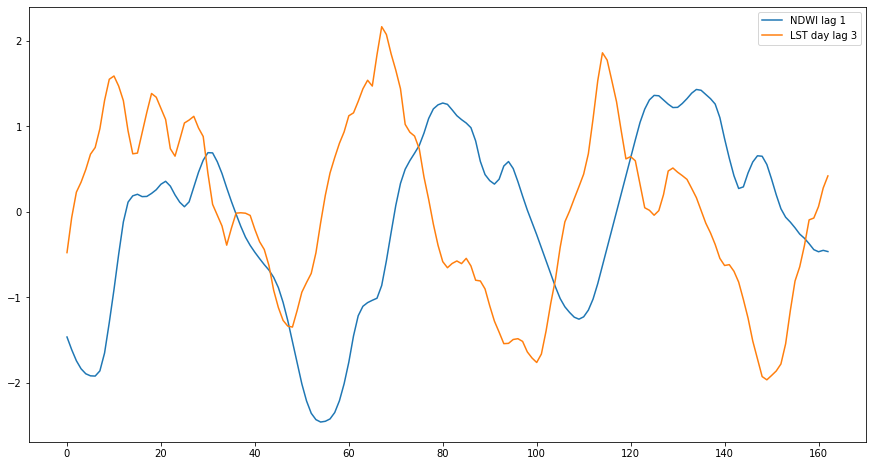

In [65]:
col_names_to_plot = ['NDWI lag 1', 'LST day lag 3']
to_plot = df_X[col_names_to_plot]
to_plot.plot(figsize=(15,8))

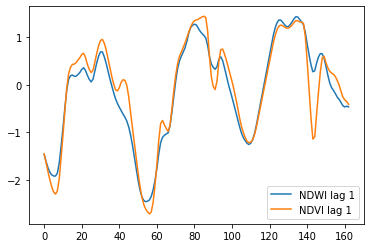

In [61]:
df_X[['NDWI lag 1', 'NDVI lag 1']].plot()

### Dependences plots for each feature vs *TRMM lag 3*

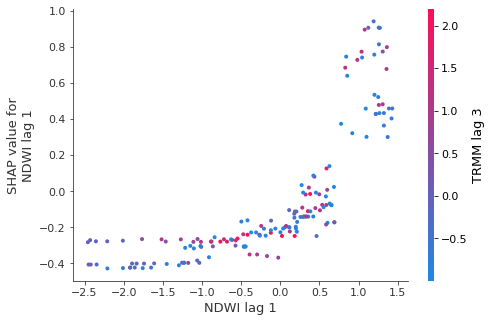

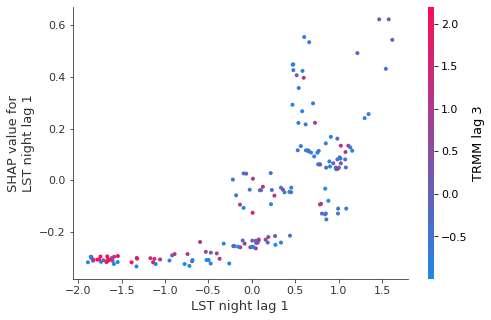

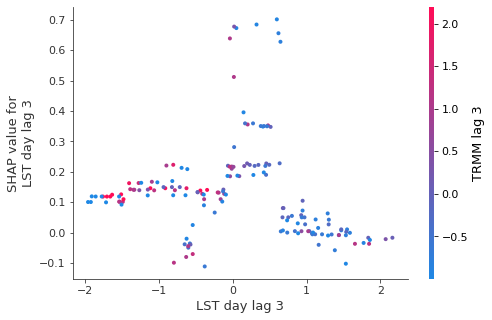

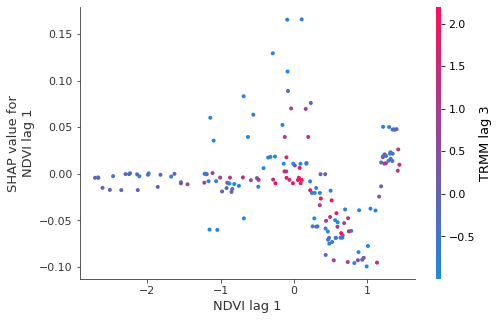

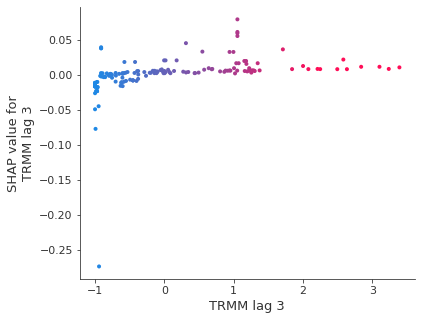

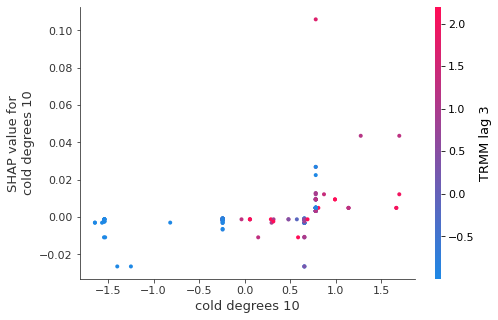

In [23]:
inter_features = ['NDWI lag 1', 'LST night lag 1', 'LST day lag 3', 'NDVI lag 1', 'TRMM lag 3', 'cold degrees 10']
for f in inter_features:
    shap.dependence_plot(f, shap_values, df_X, interaction_index='TRMM lag 3')

### Summary Plot of Shap Values for each feature

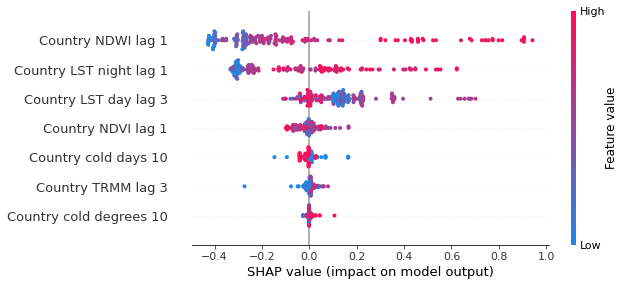

In [21]:
shap.summary_plot(shap_values, X, plot_type='dot', feature_names=col_names)

### Bar Summary Plot: absolute shap values for each feature

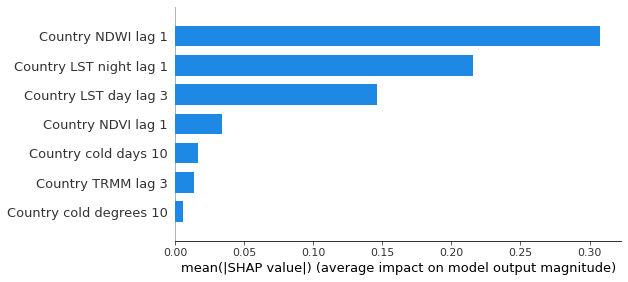

In [22]:
shap.summary_plot(shap_values, X, plot_type="bar", feature_names=col_names)